<a href="https://colab.research.google.com/github/tocom242242/autoencoder/blob/main/simple_cnn_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import copy
from IPython import display

In [2]:
def plot_imgs(imgs,shuffle=False):
    plt.figure(figsize=(10,10))
    plot_imgs = copy.deepcopy(imgs)
    if shuffle:
        np.random.shuffle(plot_imgs)
    for i in range(36):
        plt.subplot(6,6,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(np.squeeze(imgs[i]), cmap="gray", vmin=0, vmax=1)
    plt.show()

In [3]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
# (x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()
# (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data)

In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
x_train.shape[1:]

(28, 28)

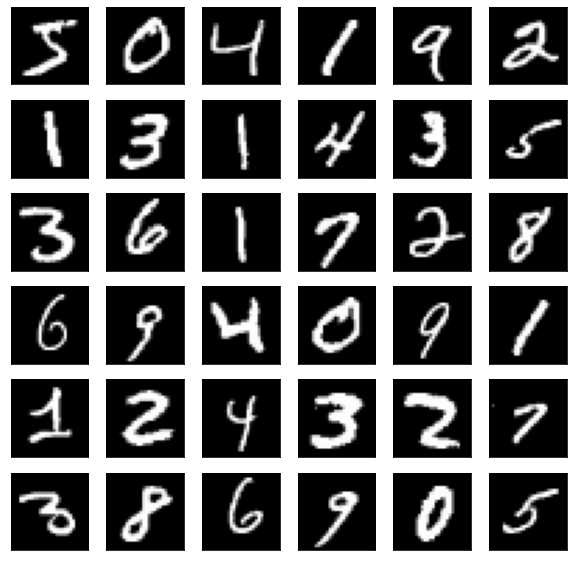

In [6]:
plot_imgs(x_train)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 16)        160       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 8)           1160      
                                                                 
 flatten (Flatten)           (None, 392)               0         
                                                                 
 dense (Dense)               (None, 32)                12576     
                                                                 
 dense_1 (Dense)             (None, 49)                1617      
                                                                 
 reshape (Reshape)           (None, 7, 7, 1)           0   

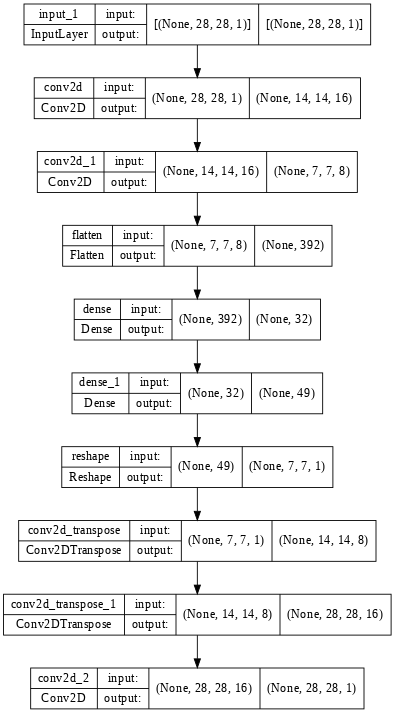

In [7]:
inputs = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2)(inputs)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)(x)
x = tf.keras.layers.Flatten()(x)
encoded = layers.Dense(32)(x)
encoder = tf.keras.Model(inputs, encoded)

x = layers.Dense(7*7)(encoded)
x = layers.Reshape((7,7,1))(x)

x = layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same')(x)
x = layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same')(x)
decoded = layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')(x)
decoder = tf.keras.Model(encoded, decoded)

autoencoder = tf.keras.Model(inputs, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()
tf.keras.utils.plot_model(autoencoder, show_shapes=True, dpi=64)

In [8]:
n = 10
input_num = 100
def plot_rec(input_images):
    plt.figure(figsize=(20, 4))
    decoded_imgs = autoencoder(input_images[:input_num], training=True)
    plt_index = np.random.randint(0,input_num,size=n)
    decoded_imgs = tf.squeeze(decoded_imgs)
    input_images = np.squeeze(input_images)

    for i in range(n):
        ax = plt.subplot(2, n, i + 1)
        idx = plt_index[i]
        plt.imshow(input_images[idx], cmap="gray", vmin=0, vmax=1)
        plt.title("input")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[idx], cmap="gray", vmin=0, vmax=1)
        plt.title("output")
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [9]:
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if epoch % 10 == 0:
            display.clear_output(wait=True)
            plot_rec(x_train)

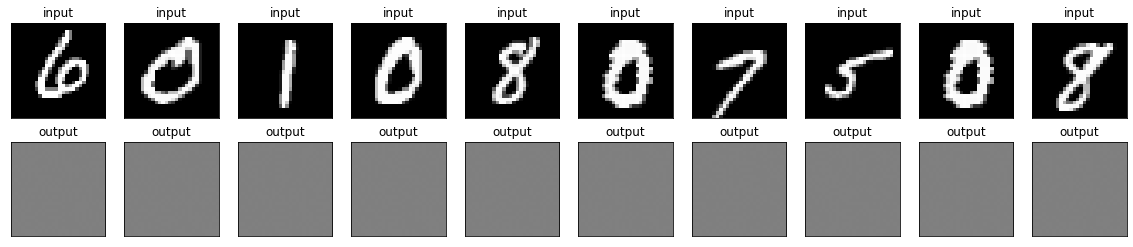

In [10]:
plot_rec(x_train)

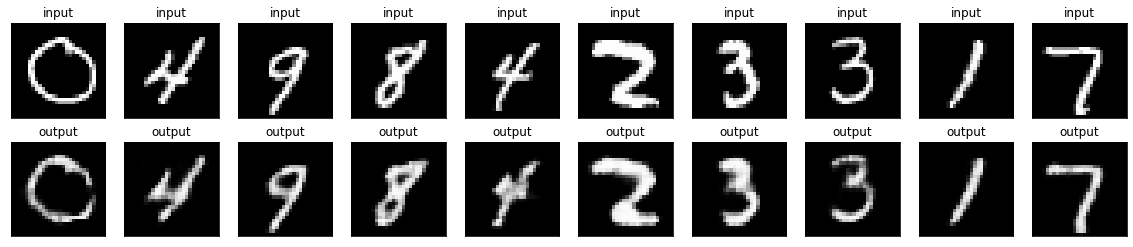

500/500 [==============================] - 3s 7ms/step - loss: 0.0975 - val_loss: 0.0962
Epoch 42/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0974 - val_loss: 0.0960
Epoch 43/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0973 - val_loss: 0.0958
Epoch 44/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0972 - val_loss: 0.0959
Epoch 45/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0971 - val_loss: 0.0956
Epoch 46/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0970 - val_loss: 0.0956
Epoch 47/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0969 - val_loss: 0.0956
Epoch 48/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0968 - val_loss: 0.0954
Epoch 49/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0968 - val_loss: 0.0962
Epoch 50/50
500/500 [==============================] - 3s 5ms/step - loss: 0.0967 - val_loss: 0.0954


In [11]:
autoencoder.fit(x_train,x_train,epochs=50, batch_size=120, shuffle=True, validation_data=(x_test,x_test),callbacks=[CustomCallback()])

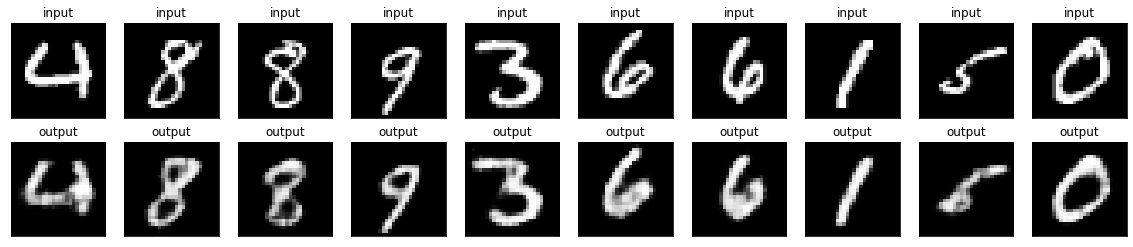

In [12]:
plot_rec(x_train)